In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/insurance.csv")
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
data["bmi_cat"] = data.bmi*10//10
y = data["bmi_cat"].value_counts()
bmi_sorted = y.sort_index()
print(bmi_sorted)

15.0     1
16.0     2
17.0    12
18.0     9
19.0    17
20.0    23
21.0    32
22.0    40
23.0    52
24.0    57
25.0    72
26.0    67
27.0    82
28.0    92
29.0    73
30.0    91
31.0    76
32.0    78
33.0    82
34.0    64
35.0    57
36.0    55
37.0    42
38.0    36
39.0    35
40.0    23
41.0    19
42.0    15
43.0     7
44.0     7
45.0     4
46.0     7
47.0     4
48.0     1
49.0     1
50.0     1
52.0     1
53.0     1
Name: bmi_cat, dtype: int64


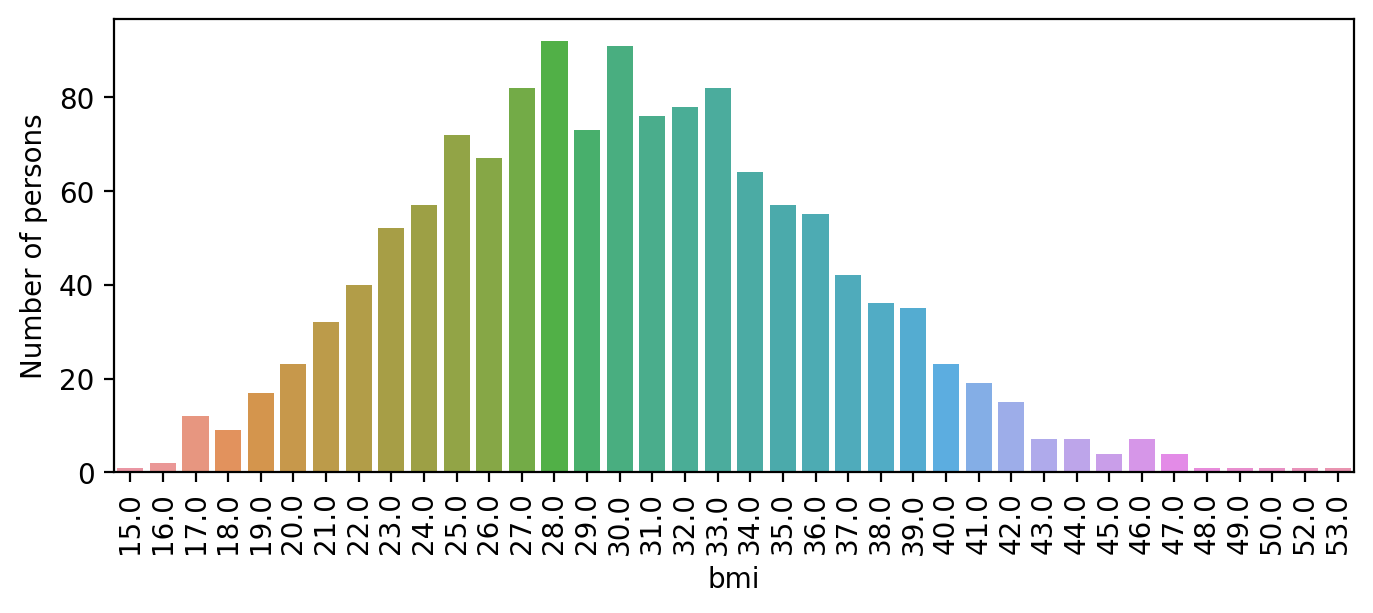

In [ ]:
plt.figure(figsize=(8,3), dpi=200)
ax = sns.barplot(x=bmi_sorted.keys(), y=bmi_sorted.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("bmi")
plt.ylabel("Number of persons")
plt.show()

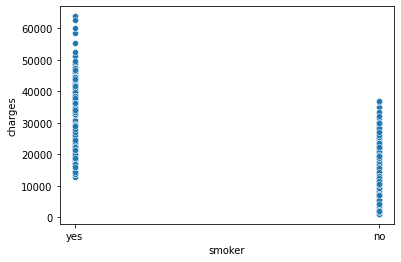

In [ ]:
sns.scatterplot(x=data.smoker, y=data.charges);

In [ ]:
print(data.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
dfs = data.groupby(["region", "smoker"]).count()
print(dfs)
print(dfs.index)

                  age  sex  bmi  children  charges  bmi_cat
region    smoker                                           
northeast no      257  257  257       257      257      257
          yes      67   67   67        67       67       67
northwest no      267  267  267       267      267      267
          yes      58   58   58        58       58       58
southeast no      273  273  273       273      273      273
          yes      91   91   91        91       91       91
southwest no      267  267  267       267      267      267
          yes      58   58   58        58       58       58
MultiIndex([('northeast',  'no'),
            ('northeast', 'yes'),
            ('northwest',  'no'),
            ('northwest', 'yes'),
            ('southeast',  'no'),
            ('southeast', 'yes'),
            ('southwest',  'no'),
            ('southwest', 'yes')],
           names=['region', 'smoker'])


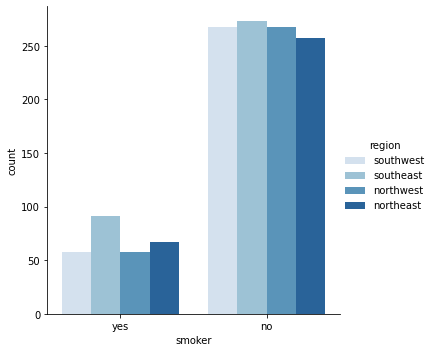

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'region', palette="Blues", data=data)
plt.show()

In [ ]:
data[["bmi","sex"]].groupby(["sex"], as_index= False).mean()

,sex,bmi
0,female,30.377749
1,male,30.943129


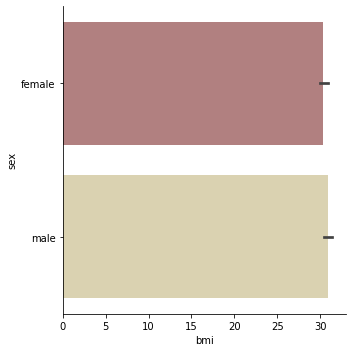

In [ ]:
sns.catplot(x="bmi", kind="bar",y = 'sex', palette="pink", data=data)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(data.sex.drop_duplicates()) 
data.sex = labelencoder.transform(data.sex)
data.sex.head()


0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

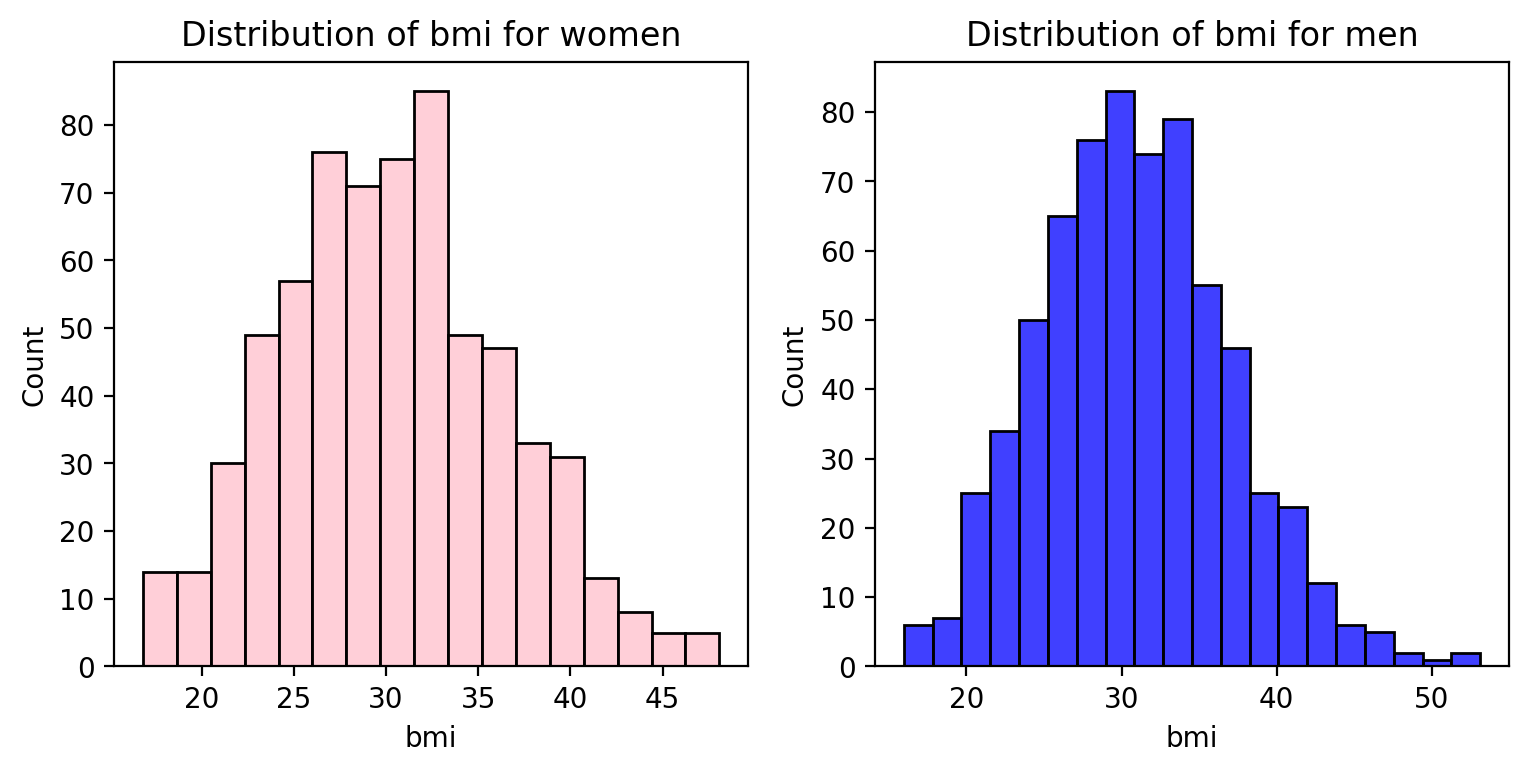

In [ ]:
plotter = plt.figure(figsize=(9,4), dpi=200)
ax = plotter.add_subplot(121)
sns.histplot(data[(data.sex == 0)]["bmi"],color='pink',ax=ax)
ax.set_title('Distribution of bmi for women')
ax = plotter.add_subplot(122)
sns.histplot(data[(data.sex == 1)]['bmi'],color='blue',ax=ax)
ax.set_title('Distribution of bmi for men')
plt.show()

In [ ]:
d_children = data.groupby(["region"]).sum()
print(f"{str(d_children.loc[d_children.children == d_children.children.max()].index[0]).capitalize()} is the region with max. children ({d_children.children.max()}).")

Southeast is the region with max. children (382).


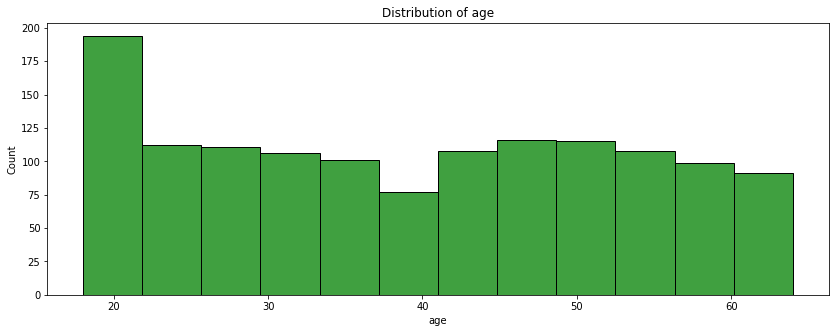

In [ ]:
plt.figure(figsize=(14,5))
plt.title("Distribution of age")
ax = sns.histplot(data["age"], color = 'green')

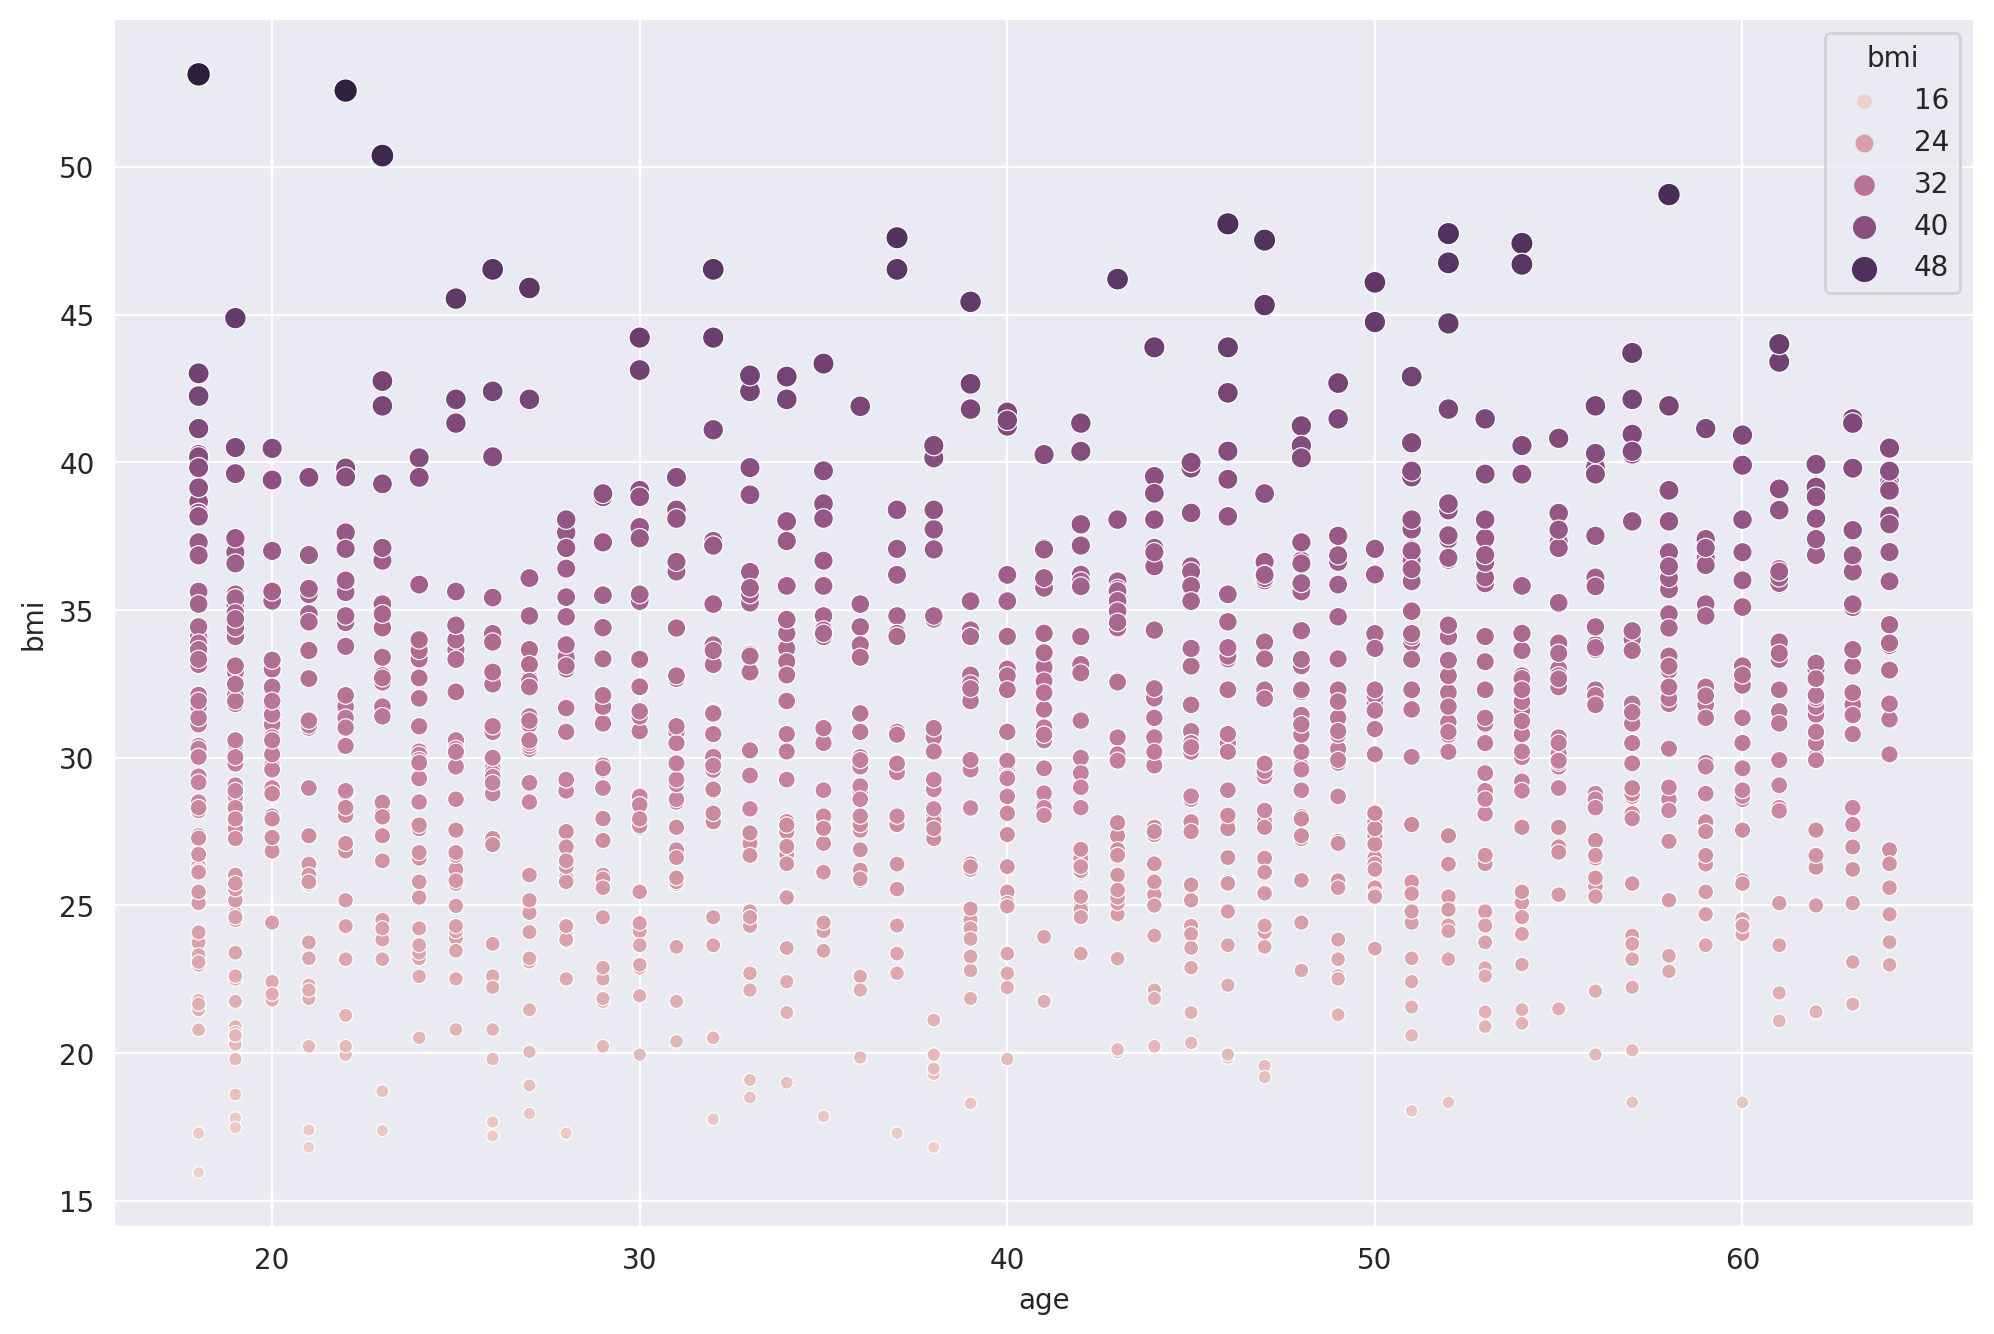

In [ ]:
plt.figure(figsize=(12,8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.scatterplot(data=data, x="age", y="bmi", hue="bmi", size="bmi")
  

children
0    30.550296
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64


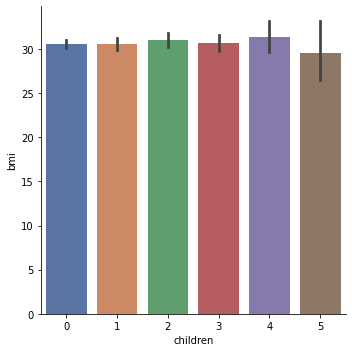

In [ ]:
d_chi_bmi_mean = data.groupby(["children"]).mean()
print(d_chi_bmi_mean["bmi"])
sns.catplot(data=data, kind="bar", x="children", y="bmi", palette="deep");

In [ ]:
# Underweight, if bmi is < 18.5, severe obesity if bmi > 40
undweight = data[data["bmi"] < 18.5].count()
obese_weight = data[data["bmi"] > 40].count()
print(f"{undweight['bmi']} people have a bmi less than 18.5 and should be considered as underweight.")
print(f"{obese_weight['bmi']} people have a bmi higher than 40 and should be considered as morbid obese.")

20 people have a bmi less than 18.5 and should be considered as underweight.
91 people have a bmi higher than 40 and should be considered as morbid obese.


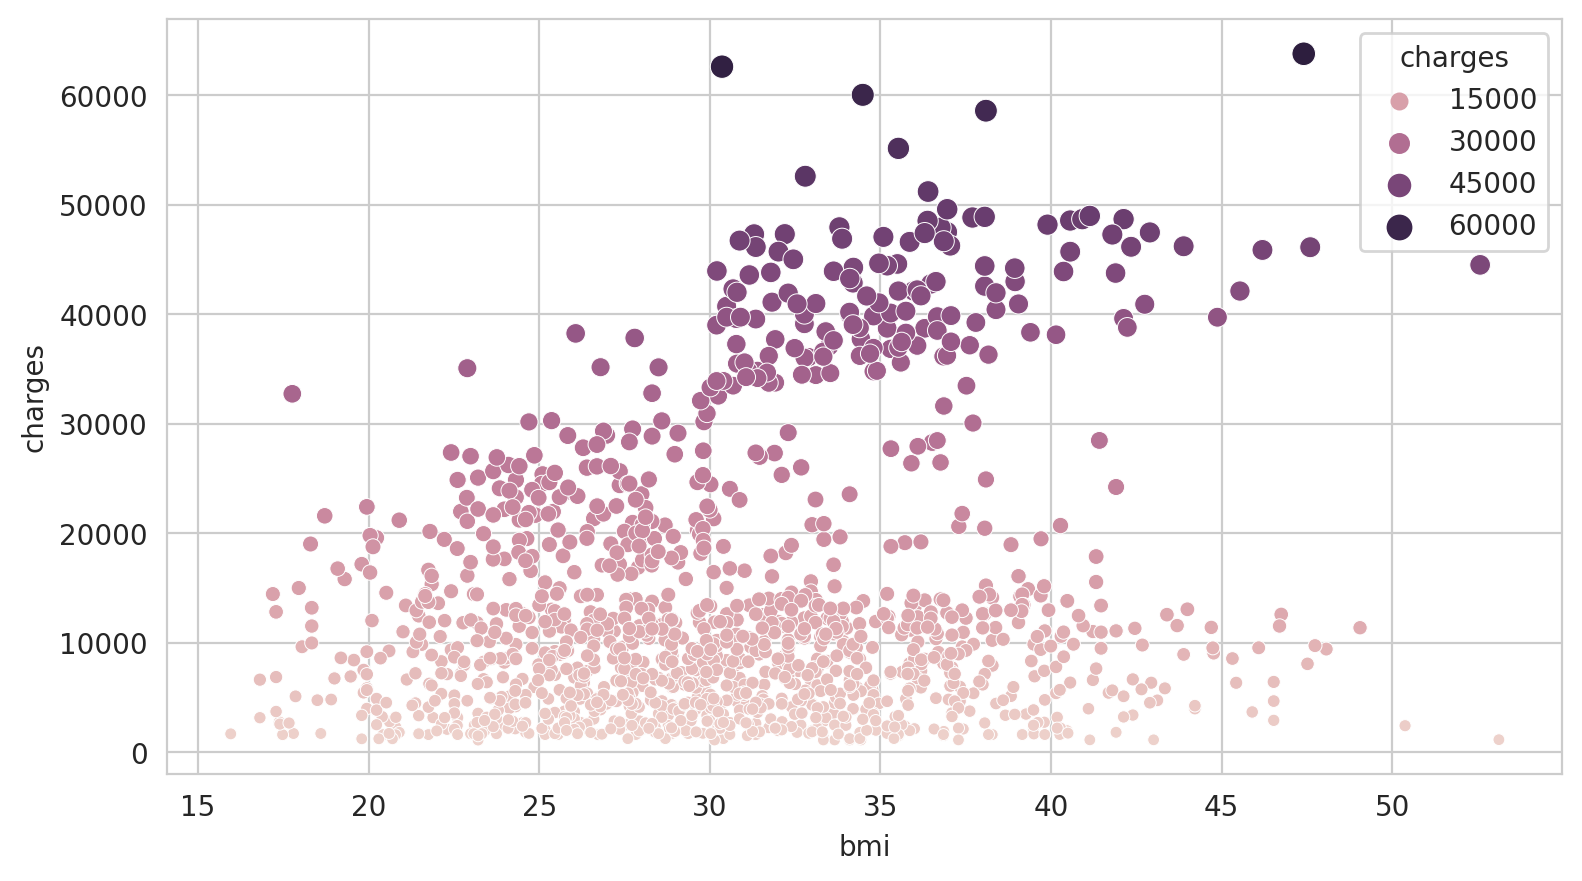

In [ ]:
plt.figure(figsize=(9,5), dpi=200)
with sns.axes_style("whitegrid"):
  sns.scatterplot(data=data, x="bmi", y="charges", hue="charges", size="charges")

In [ ]:
data_nw = data[data["region"] == "northwest"]
data_ne = data[data["region"] == "northeast"]
data_sw = data[data["region"] == "southwest"]
data_se = data[data["region"] == "southeast"]

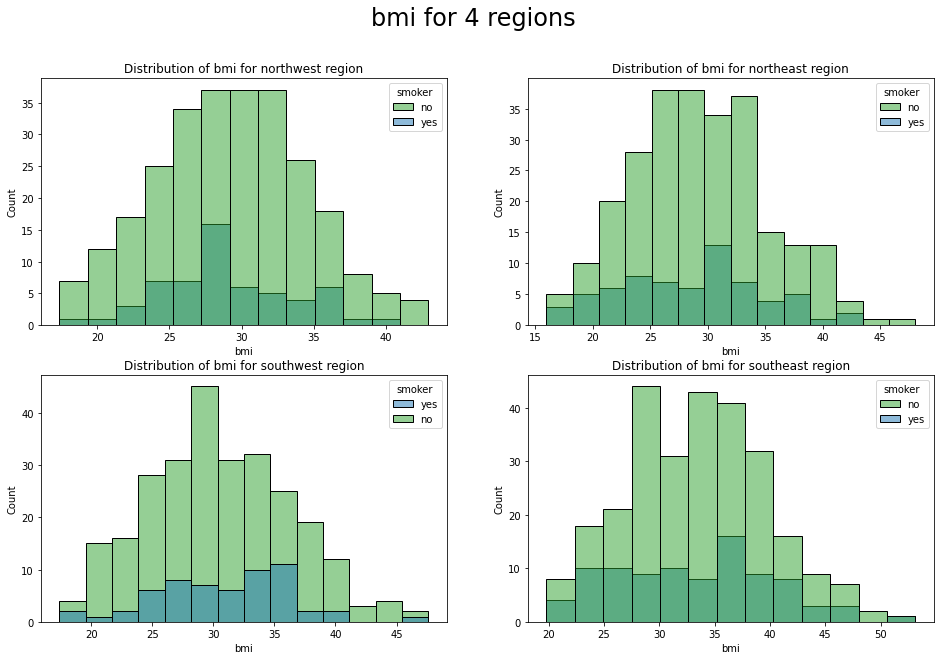

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('bmi for 4 regions', size=24)
palette = {"yes": 'tab:blue',
           "no": 'tab:green'    
}
sns.histplot(data = data_nw, x="bmi", hue="smoker", ax=axes[0,0], palette=palette)
axes[0,0].set_title('Distribution of bmi for northwest region')

sns.histplot(data = data_ne, x="bmi", hue="smoker", ax=axes[0,1], palette=palette)
axes[0,1].set_title('Distribution of bmi for northeast region')

sns.histplot(data = data_sw, x="bmi", hue="smoker", ax=axes[1,0], palette=palette)
axes[1,0].set_title('Distribution of bmi for southwest region')

sns.histplot(data = data_se, x="bmi", hue="smoker", ax=axes[1,1], palette=palette)
axes[1,1].set_title('Distribution of bmi for southeast region')
plt.show()